## Project Description

You have been assigned an analytical task by an international online store. Your predecessor was unable to complete it: they launched an A/B test and then left (to start a watermelon farm in Tocantins). They left only the technical specifications and test results.

**Technical Description**

Test name: recommender_system_test
Groups: A (control) and B (new payment funnel)
Start date: 07-12-2020
End of new user intake: 21-12-2020
End date: 01-01-2021
Audience: 15% of new users from the EU region
Purpose of the test: to test changes related to the introduction of an improved recommendation system
Expected result: within 14 days of registration, users show better conversion in product page views (product_page event), adding items to the cart (product_cart), and purchases (purchase). In each step of the funnel—product_page → product_cart → purchase—there should be at least a 10% increase.
Expected number of test participants: 6000

## Inicialization

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

## Loading the dataset

In [4]:
# 2020 Marketing Event Calendar
df_ab_calendario = pd.read_csv("ab_project_marketing_events_us.csv")

In [5]:
# All users who registered in the online store from December 7 to December 21, 2020
df_ab_users = pd.read_csv("final_ab_new_users_upd_us.csv")

In [6]:
# All events for new users within the period from December 7, 2020, to January 1, 2021
df_ab_events = pd.read_csv("final_ab_events_upd_us.csv")

In [7]:
# Table containing test participants
df_ab_test = pd.read_csv("final_ab_participants_upd_us.csv")

# Viewing the data

In [8]:
df_ab_calendario.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [9]:
df_ab_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [10]:
df_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [11]:
df_ab_test.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


## Data Preprocessing

In [12]:
# Viewing the data
df_ab_calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


Notes on the df_ab_calendario Data:

The data in the dataframe df_ab_calendario requires changes from 'object' to 'datetime' for the following columns: start_dt and finish_dt.

In [13]:
# Searching for Duplicate Values
df_ab_calendario.duplicated().sum()

0

In [14]:
# Locating Missing Values
df_ab_calendario.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [15]:
# Converting Data Type of 'start_dt'
df_ab_calendario['start_dt'] = pd.to_datetime(df_ab_calendario['start_dt'])

In [16]:
# Converting Data Type of 'finish_dt'
df_ab_calendario['finish_dt'] = pd.to_datetime(df_ab_calendario['finish_dt'])

In [17]:
# Viewing the dataset
df_ab_calendario.head(14)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [18]:
# Viewing the data
df_ab_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


### Notes on the df_ab_users Data:


The data in the dataframe df_ab_users requires a change from 'object' to 'datetime' for the column first_date.

I will also rename the column N.America for better understanding of the region.

In [19]:
# Searching for Duplicate Values
df_ab_users.duplicated().sum()

0

In [20]:
# Locating Missing Values
df_ab_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [21]:
# Converting Data Type of 'first_date'
df_ab_users['first_date'] = pd.to_datetime(df_ab_users['first_date'])

In [22]:
# Changing the string name of 'N.America' > 'NA'
df_ab_users['region'] = df_ab_users['region'].replace('N.America', 'NA')

In [23]:
# Viewing the dataset
df_ab_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,NA,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,NA,iPhone


In [24]:
# Viewing the data
df_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [25]:
# Searching for Duplicate Values
df_ab_events.duplicated().sum()

0

In [26]:
# Locating Missing Values
df_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64


### Notes on the df_ab_events Data:


The missing values in df_ab_events['details'] are unrelated to the spending values (USD), meaning they are not numerical. I will not drop these values, as they do not interfere with my objective.

In [27]:
# Converting Data Type of 'event_dt'
df_ab_events['event_dt'] = pd.to_datetime(df_ab_events['event_dt'])

In [28]:
# viewing the dataset
df_ab_events.tail(10)

,user_id,event_dt,event_name,details
423751,1455450835F72F5E,2020-12-30 09:27:10,login,NaN
423752,339C4C55021A83C6,2020-12-30 12:55:08,login,NaN
423753,33E7BCF696B41C7B,2020-12-30 12:21:24,login,NaN
423754,D1553B56FFA8974B,2020-12-30 03:15:35,login,NaN
423755,6181F3835EBE66BF,2020-12-30 12:00:00,login,NaN
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN
423760,7AEC61159B672CC5,2020-12-30 11:36:13,login,NaN



### Notes on the df_ab_test Data:


No missing or duplicate values were found in df_ab_test, and the data types are correct for the analysis.

In [29]:
# Viewing the data
df_ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [30]:
# Searching for Duplicate Values
df_ab_test.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [31]:
# Locating Missing Values
df_ab_test.duplicated().sum()

0

In [32]:
# Viewing the dataset
df_ab_test.head(10)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


## Exploratory Data Analysis (EDA)

Conduct exploratory data analysis:

- Study the conversion at different stages of the funnel.
- Is the number of events per user equally distributed between the samples?
- Are users from both samples present?
- How is the number of events distributed across the days?
- Are there any particularities in the data that you should consider before starting the A/B test?

## Study the conversion at different stages of the funnel.

In [33]:
# Checking the Unique Event Types Present in the Dataframe
events_unique = df_ab_events['event_name'].unique()
# Visualizing the Event Types
print(events_unique)

['purchase' 'product_cart' 'product_page' 'login']


In [34]:
df_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [35]:
df_ab_test.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [ ]:
# Counting the Number of Unique Users at Each Funnel Stage
users_product_page = df_ab_events[df_ab_events['event_name'] == 'product_page']['user_id'].nunique()
users_product_cart = df_ab_events[df_ab_events['event_name'] == 'product_cart']['user_id'].nunique()
users_purchase = df_ab_events[df_ab_events['event_name'] == 'purchase']['user_id'].nunique()
# Displaying Users by Stage
print(f"Usuários na etapa 'product_page': {users_product_page}")
print(f"Usuários na etapa 'product_cart': {users_product_cart}")
print(f"Usuários na etapa 'purchase': {users_purchase}")

Usuários na etapa 'product_page': 38929
Usuários na etapa 'product_cart': 19284
Usuários na etapa 'purchase': 19568


In [45]:
# Filtering Funnel Events
df_page = df_ab_events[df_ab_events['event_name'] == 'product_page']
df_cart = df_ab_events[df_ab_events['event_name'] == 'product_cart']
df_purchases = df_ab_events[df_ab_events['event_name'] == 'purchase']

# Joining with the Test Groups [df_ab_test] to Identify Who Belongs to Group A and B
df_page = df_page.merge(df_ab_test, on='user_id', how='left')
df_cart = df_cart.merge(df_ab_test, on='user_id', how='left')
df_purchases = df_purchases.merge(df_ab_test, on='user_id', how='left')

# Counting Unique Users at Each Funnel Stage by Group [A, B]
users_page = df_page.groupby('group')['user_id'].nunique()
users_cart = df_cart.groupby('group')['user_id'].nunique()
users_purchase = df_purchases.groupby('group')['user_id'].nunique()

# Calculating Conversion Rates
conversion_page_to_cart = (users_cart / users_page) * 100
conversion_cart_to_purchase = (users_purchase / users_cart) * 100

# Displaying the Results
print("Conversão de 'product_page' for 'product_cart':")
print(conversion_page_to_cart)
print("\nConversão de 'product_cart' for 'purchase':")
print(conversion_cart_to_purchase)

Conversão de 'product_page' for 'product_cart':
group
A    47.676651
B    51.103864
Name: user_id, dtype: float64

Conversão de 'product_cart' for 'purchase':
group
A    108.014499
B     98.576338
Name: user_id, dtype: float64


In [46]:
# Conversion Rates by Group in %
conv_rate_page_to_cart_A = users_cart['A'] / users_page['A']
conv_rate_page_to_cart_B = users_cart['B'] / users_page['B']

conv_rate_cart_to_purchase_A = users_purchase['A'] / users_cart['A']
conv_rate_cart_to_purchase_B = users_purchase['B'] / users_cart['B']

print(f"Conversion rate of 'product_page' for 'product_cart' - Group A: {conv_rate_page_to_cart_A:.2%}")
print(f"Conversion rate of 'product_page' for 'product_cart' - Group B: {conv_rate_page_to_cart_B:.2%}")
print(f"Conversion rate of 'product_cart' for 'purchase' - Group A: {conv_rate_cart_to_purchase_A:.2%}")
print(f"Conversion rate of 'product_cart' for 'purchase' - Group B: {conv_rate_cart_to_purchase_B:.2%}")


Conversion rate of 'product_page' for 'product_cart' - Group A: 47.68%
Conversion rate of 'product_page' for 'product_cart' - Group B: 51.10%
Conversion rate of 'product_cart' for 'purchase' - Group A: 108.01%
Conversion rate of 'product_cart' for 'purchase' - Group B: 98.58%


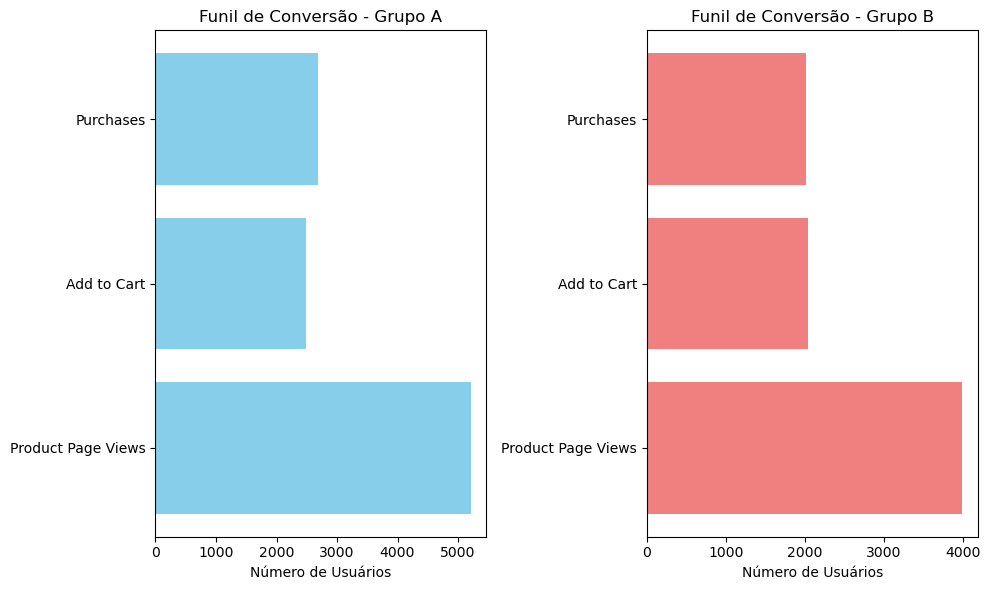

In [ ]:
labels = ['Product Page Views', 'Add to Cart', 'Purchases']
group_a = [users_page['A'], users_cart['A'], users_purchase['A']]
group_b = [users_page['B'], users_cart['B'], users_purchase['B']]

# Chart Size Configuration
plt.figure(figsize = (10, 6))

# Graph for Group A
plt.subplot(1, 2, 1)
plt.barh(labels, group_a, color='skyblue')
plt.title("Funil de Conversão - Grupo A")
plt.xlabel('Número de Usuários')

# Graph for Group B
plt.subplot(1, 2, 2)
plt.barh(labels, group_b, color='lightcoral')
plt.title("Funil de Conversão - Grupo B")
plt.xlabel('Número de Usuários')

# Plotting the graph
plt.tight_layout()
plt.show()


Note:

-  From the analysis of the graph, we observe that in Group A (control), there were more product page views compared to Group B (new payment funnel). However, in Group B, it was possible to notice an improvement in the subsequent funnel stages, with an increase in the number of users who added products to the cart and completed the purchase.

# Is the number of events per user equally distributed between the samples?

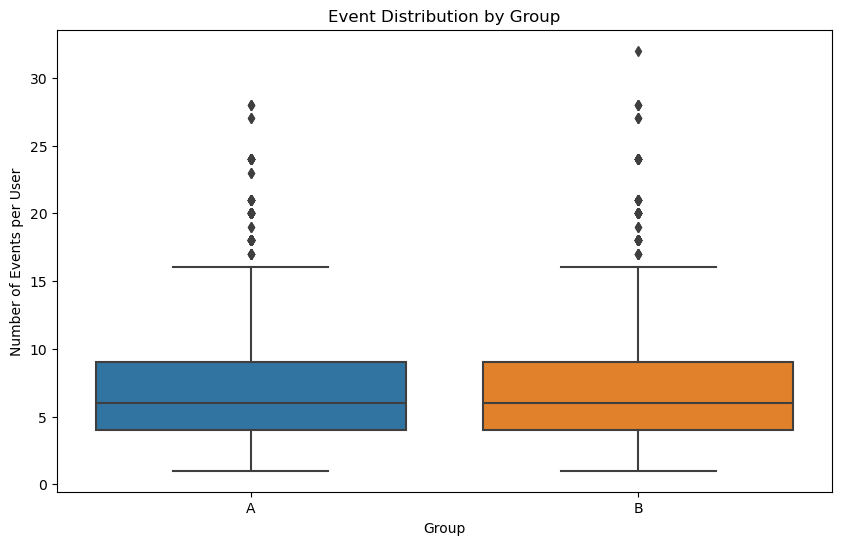

In [47]:
# Checking the Number of Events per User
event_count_per_user = df_ab_events.groupby('user_id')['event_name'].count().reset_index(name='event_count')

# Adding the Group (A or B) to the Events DataFrame
event_count_per_user = event_count_per_user.merge(df_ab_test[['user_id', 'group']], on='user_id', how='left')

plt.figure(figsize = (10, 6))
sns.boxplot(data = event_count_per_user, x='group', y='event_count')
plt.title('Event Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Number of Events per User')
plt.show()


Note:

-  Most users perform a similar number of events in both groups, as indicated by the proximity of the medians. However, Group B shows a higher number of outliers compared to Group A, suggesting that, while the typical behavior of users is similar across groups, there is a larger number of users in Group B who demonstrate a higher level of engagement.

# Are users from both samples present?

In [ ]:
# Checking if all users from df_ab_test are present in df_ab_events
usuarios_no_teste = set(df_ab_test['user_id'])
usuarios_nos_eventos = set(df_ab_events['user_id'])

# Comparing the users present in both DataFrames
usuarios_faltantes = usuarios_no_teste - usuarios_nos_eventos
print(f'Usuários no teste e sem eventos: {len(usuarios_faltantes)}')

Usuários no teste e sem eventos: 0


Note:

- The users from both samples are present, and no missing users were found in the tests.

# How is the number of events distributed across the days?

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


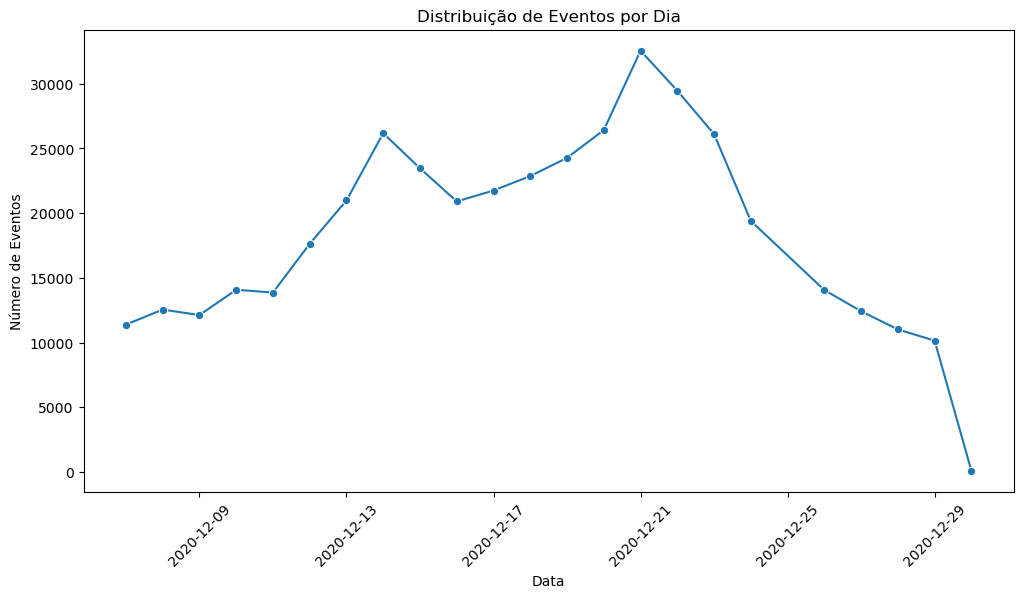

In [ ]:
# Converting event_dt to datetime format
df_ab_events['event_dt'] = pd.to_datetime(df_ab_events['event_dt'])

# Creating a date column for df_ab_events
df_ab_events['event_date'] = df_ab_events['event_dt'].dt.date

# Counting events per day
eventos_por_dia = df_ab_events.groupby('event_date').size().reset_index(name='event_count')

# Plotting the event distribution across days
plt.figure(figsize=(12, 6))
sns.lineplot(data=eventos_por_dia, x='event_date', y='event_count', marker='o')
plt.title('Distribuição de Eventos por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()


Notes:

- We observe a significant increase in access on 13/12/2020 and 21/12/2020, indicating activity spikes during this period, possibly due to promotions or seasonal events. However, after 23/12/2020, there is a notable drop in access, suggesting that demand or interest decreased after this peak.

- This could be due to the end of promotions or the approach of the holiday period when users tend to access less.

# Are there any particularities in the data that you should consider before starting the A/B test?

In [49]:
# Identifying Users with Very High or Low Number of Events
usuarios_eventos = df_ab_events.groupby('user_id').size().reset_index(name='event_count')

# Detecting outliers (set a threshold for very high events, e.g., above the 95th percentile)
q95 = usuarios_eventos['event_count'].quantile(0.95)
outliers = usuarios_eventos[usuarios_eventos['event_count'] > q95]
print(f'Users with the number of events above {q95}: {len(outliers)}')

# Listing some outliers
print(outliers.head())


Users with the number of events above 15.0: 2469
             user_id  event_count
1   000199F1887AE5E6           16
8   000921BDA987CB74           17
25  00187B30B10E5180           16
40  00299902F77C0C2C           16
84  00607344650B2FB0           21


Note: 

- We can observe some outliers in a few of the users.

# Evaluate the results of the A/B test:

- What can you say about the results of the A/B test?
- Use a z-test to verify the statistical difference between the proportions.
- Describe your conclusions about the EDA stage and the result of the A/B test.

Note: 

- In the A/B test, I noticed that in the step (event) of viewing the product page to adding to the cart, the results were contrary to expectations, as the control group (A) had a higher number of users compared to group B. However, I observed a higher level of engagement from users in group B compared to group A.

In [50]:
# Defining the success counts (users who progressed) and the total number of users for each group
success_a = [users_cart['A'], users_purchase['A']]  # Number of users who progressed through the stages in Group A
success_b = [users_cart['B'], users_purchase['B']]  # Number of users who progressed through the stages in Group B

# Total number of users who viewed the product at each stage of the funnel in Groups A and B
n_a = [users_page['A'], users_page['A']]  # Total number of users at the product view stage in Group A
n_b = [users_page['B'], users_page['B']]  # Total number of users at the product view stage in Group B

# Z-test to verify the difference between the groups in the product_cart and purchase stages
for i in range(len(success_a)):
    # Count of successes and number of observations (total users) for each group
    count = [success_a[i], success_b[i]]  # Successes for group A and B at stage i
    nobs = [n_a[i], n_b[i]]  # Total users who reached stage i in group A and B
    
    # Performing the z-test for proportions
    z_stat, p_value = proportions_ztest(count, nobs)
    
    # Displaying the results
    print(f"Etapa {i + 1}: Z-stat = {z_stat:.4f}, P-value = {p_value:.4f}")
    
    # Checking if the result is statistically significant
    if p_value < 0.05: # Significance level
        print(f"Conclusion: There is a statistically significant difference at the {i + 1} (p < 0.05).")
        # Additional interpretation for the business
        if z_stat > 0:
            print(f"In group B, there was better performance compared to group A at this stage {i + 1}. This indicates that the new recommendation system is increasing conversions at this stage.")
        else:
            print(f"In group A, there was better performance compared to group B at this stage {i + 1}. This indicates that the recommendation system in group B is not functioning as expected at this stage.")
    else:
        print(f"Conclusion: There is no statistically significant difference at this stage. {i + 1} (p >= 0.05).")
        print(f"This suggests that the new recommendation system did not have a measurable impact on conversion at this stage. {i + 1}.")


Etapa 1: Z-stat = -3.2575, P-value = 0.0011
Conclusion: There is a statistically significant difference at the 1 (p < 0.05).
In group A, there was better performance compared to group B at this stage 1. This indicates that the recommendation system in group B is not functioning as expected at this stage.
Etapa 2: Z-stat = 1.0659, P-value = 0.2865
Conclusion: There is no statistically significant difference at this stage. 2 (p >= 0.05).
This suggests that the new recommendation system did not have a measurable impact on conversion at this stage. 2.


# Conclusion:

- In the EDA, we investigated the conversion at different stages of the funnel for the A/B test and observed that the number of events per user and the presence of users were well distributed between groups A (control) and B (test). I also noticed that the number of events varied depending on the day, and this could influence the conversion rates.

- The A/B test showed that the new recommendation system performed well in encouraging more people to add items to the cart but failed to significantly increase the number of purchases. Additionally, we observed that group B had more interactions, suggesting that the new system generated more interest, but this did not convert into more sales.


# Suggestion:

- My suggestion is that it may be useful to adjust the recommendation system to try to improve the final conversion rates, or alternatively, investigate other factors that may be affecting users' purchasing decisions.